## Trabajo Final - Diplomatura en Ciencia de Datos Aplicada 📊
### Integrantes:
* Boladeras Facundo
* Fontanini Pablo
* Miller Marcos
* Baeza Noeli

In [297]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras

# Explorar dataset

In [298]:
# Lectura del csv
df = pd.read_csv(r"Datos_TP_final.csv")

In [299]:
df

,CICLO,EVENTO,LOTE,SUP,pp Nov,pp Dic,pp Ene,IPC,EROSION POTENCIAL,EVI 1 Nov media,...,EVI 17 Ene min,EVI 17 Ene max,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max,RINDE,H_Nov,H_Dic,H_Ene,Unnamed: 34
0,2001/02,Neutro,TEMPEL N2,64.8,353,140,156,52,moderadamente susceptible,0.21,...,0.61,0.62,0.49,0.47,0.51,6675,1458,677,1064,NaN
1,2001/02,Neutro,3D,118.4,353,140,156,34,practicamente no susceptible,0.51,...,0.30,0.58,0.19,0.16,0.30,8357,1463,696,1111,NaN
2,2001/02,Neutro,6NORTE,143.6,353,140,156,32,moderadamente susceptible,0.48,...,0.29,0.34,0.19,0.16,0.33,7296,1459,689,1093,NaN
3,2001/02,Neutro,BUEYES NORTE,143.1,358,136,120,32,moderadamente susceptible,0.33,...,0.45,0.76,0.47,0.32,0.60,4668,1455,689,1092,NaN
4,2001/02,Neutro,4,69.4,337,153,170,50,moderadamente susceptible,0.37,...,0.48,0.53,0.30,0.29,0.34,5848,1483,759,1239,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2016/17,Niña,1,92.3,231,367,399,40,moderadamente susceptible,0.34,...,0.53,0.59,0.39,0.34,0.41,6484,783,1315,1483,NaN
172,2016/17,Niña,6N,213.8,228,389,407,50,practicamente no susceptible,0.41,...,0.40,0.53,0.27,0.21,0.47,8030,770,1328,1480,NaN
173,2016/17,Niña,11,79.1,231,367,399,73,levemente susceptible,0.34,...,0.50,0.68,0.26,0.25,0.28,6507,783,1307,1490,NaN
174,2016/17,Niña,PEREGRINA,129.1,228,389,407,32,moderadamente susceptible,0.38,...,0.47,0.73,0.37,0.32,0.52,7896,779,1318,1482,NaN


In [300]:
df.isnull().sum()

CICLO                  0
EVENTO                 0
LOTE                   0
SUP                    0
pp Nov                 0
pp Dic                 0
pp Ene                 0
IPC                    0
EROSION POTENCIAL      0
EVI 1 Nov media        0
EVI 1 Nov min          0
EVI 1 Nov max          0
EVI 17 Nov media       0
EVI 17 Nov min         0
EVI 17 Nov max         0
EVI 3 Dic media        0
EVI 3 Dic min          0
EVI 3 Dic max          0
EVI 19 Dic media       0
EVI 19 Dic min         0
EVI 19 Dic max         0
EVI 1 Ene media        0
EVI 1 Ene min          0
EVI 1 Ene max          0
EVI 17 Ene media       0
EVI 17 Ene min         0
EVI 17 Ene max         0
EVI 2 Feb media        0
EVI 2 Feb min          0
EVI 2 Feb max          0
RINDE                  0
H_Nov                  0
H_Dic                  0
H_Ene                  0
Unnamed: 34          176
dtype: int64

In [301]:
# Visualizar las dimensiones del dataframe
df.shape
print("El dataframe tiene", df.shape[0], "filas y", df.shape[1], "columnas")

El dataframe tiene 176 filas y 35 columnas


In [302]:
# Obtén la columna "RINDE"
rinde_column = df.pop("RINDE")
# Agrega la columna "RINDE" al final del DataFrame
df["RINDE"] = rinde_column
df = df.drop(["Unnamed: 34", "CICLO", "LOTE"], axis=1)
df

,EVENTO,SUP,pp Nov,pp Dic,pp Ene,IPC,EROSION POTENCIAL,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,...,EVI 17 Ene media,EVI 17 Ene min,EVI 17 Ene max,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max,H_Nov,H_Dic,H_Ene,RINDE
0,Neutro,64.8,353,140,156,52,moderadamente susceptible,0.21,0.20,0.24,...,0.62,0.61,0.62,0.49,0.47,0.51,1458,677,1064,6675
1,Neutro,118.4,353,140,156,34,practicamente no susceptible,0.51,0.46,0.62,...,0.38,0.30,0.58,0.19,0.16,0.30,1463,696,1111,8357
2,Neutro,143.6,353,140,156,32,moderadamente susceptible,0.48,0.46,0.51,...,0.31,0.29,0.34,0.19,0.16,0.33,1459,689,1093,7296
3,Neutro,143.1,358,136,120,32,moderadamente susceptible,0.33,0.25,0.48,...,0.59,0.45,0.76,0.47,0.32,0.60,1455,689,1092,4668
4,Neutro,69.4,337,153,170,50,moderadamente susceptible,0.37,0.24,0.43,...,0.51,0.48,0.53,0.30,0.29,0.34,1483,759,1239,5848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Niña,92.3,231,367,399,40,moderadamente susceptible,0.34,0.30,0.39,...,0.56,0.53,0.59,0.39,0.34,0.41,783,1315,1483,6484
172,Niña,213.8,228,389,407,50,practicamente no susceptible,0.41,0.35,0.47,...,0.44,0.40,0.53,0.27,0.21,0.47,770,1328,1480,8030
173,Niña,79.1,231,367,399,73,levemente susceptible,0.34,0.32,0.38,...,0.54,0.50,0.68,0.26,0.25,0.28,783,1307,1490,6507
174,Niña,129.1,228,389,407,32,moderadamente susceptible,0.38,0.33,0.52,...,0.58,0.47,0.73,0.37,0.32,0.52,779,1318,1482,7896


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVENTO             176 non-null    object 
 1   SUP                176 non-null    float64
 2   pp Nov             176 non-null    object 
 3   pp Dic             176 non-null    object 
 4   pp Ene             176 non-null    object 
 5   IPC                176 non-null    object 
 6   EROSION POTENCIAL  176 non-null    object 
 7   EVI 1 Nov media    176 non-null    float64
 8   EVI 1 Nov min      176 non-null    float64
 9   EVI 1 Nov max      176 non-null    float64
 10  EVI 17 Nov media   176 non-null    float64
 11  EVI 17 Nov min     176 non-null    float64
 12  EVI 17 Nov max     176 non-null    float64
 13  EVI 3 Dic media    176 non-null    float64
 14  EVI 3 Dic min      176 non-null    float64
 15  EVI 3 Dic max      176 non-null    float64
 16  EVI 19 Dic media   176 non

In [304]:
object_columns = df.select_dtypes(include=['object'])

print(object_columns.columns)

Index(['EVENTO', 'pp Nov', 'pp Dic', 'pp Ene', 'IPC', 'EROSION POTENCIAL',
       'H_Nov', 'H_Dic', 'H_Ene'],
      dtype='object')


In [305]:
class ConvertObjectToInt:
    def __init__(self, df, columns_to_convert):
        self.df = df
        self.columns_to_convert = columns_to_convert

    def convert_columns(self):
        for column in self.columns_to_convert:
            if self.df[column].dtype == 'object':
                try:
                    # Intenta convertir valores válidos a numéricos y establecer los no válidos como NaN
                    self.df[column] = pd.to_numeric(self.df[column], errors='coerce')
                    # Rellena los NaN con un valor predeterminado (por ejemplo, 0)
                    self.df[column].fillna(0, inplace=True)
                    # Convierte la columna a tipo int
                    self.df[column] = self.df[column].astype(int)
                except ValueError as e:
                    print(f"Error al convertir la columna {column}: {e}")

In [306]:
columns_to_convert = ["pp Nov", "pp Dic", 'pp Ene', 'H_Nov', 'H_Dic', "H_Ene", "IPC"]

converter = ConvertObjectToInt(df, columns_to_convert)
converter.convert_columns()

# Funciones Aux

# Preprosesamiento

In [307]:
class CustomOneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_encode):
        self.columns_to_encode = columns_to_encode
        self._oh = OneHotEncoder(sparse=False)
        self._columns = None

    def fit(self, X, y=None):
        X_cat = X[self.columns_to_encode]
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy[self.columns_to_encode]
        X_num = X_copy.drop(self.columns_to_encode, axis=1)
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh,
                                columns=self._columns,
                                index=X_copy.index)
        X_copy = X_num.join(X_cat_oh)
        return X_copy

In [308]:
# Definir las columnas que deseas codificar
columns_to_encode = ['EVENTO', 'EROSION POTENCIAL']

# Crear una instancia de CustomOneHotEncoding
custom_encoder = CustomOneHotEncoding(columns_to_encode)

# A continuación, puedes ajustar y transformar tu DataFrame
df = custom_encoder.fit_transform(df)


In [309]:
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.robust_scaler = RobustScaler()
        self.robust_scaler.fit(X)
        return self
    
    def transform(self, X, y=None):
        X_scaled = self.robust_scaler.transform(X)
        X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
        return X_scaled_df

In [310]:
custom_scaler = CustomScaler()

df = custom_scaler.fit_transform(df)


In [311]:
df

,SUP,pp Nov,pp Dic,pp Ene,IPC,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,EVI 17 Nov media,EVI 17 Nov min,...,H_Ene,RINDE,EVENTO_Neutro,EVENTO_Niña,EVENTO_Niño,EROSION POTENCIAL_None,EROSION POTENCIAL_altamente susceptible,EROSION POTENCIAL_levemente susceptible,EROSION POTENCIAL_moderadamente susceptible,EROSION POTENCIAL_practicamente no susceptible
0,-0.209634,0.916399,-0.382353,-0.473684,0.557377,-0.928571,-0.754717,-1.0625,-0.523077,-0.028571,...,0.029467,-0.196513,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.746655,0.916399,-0.382353,-0.473684,-0.622951,1.214286,1.207547,1.3125,0.892308,1.114286,...,0.100491,0.351638,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.196253,0.916399,-0.382353,-0.473684,-0.754098,1.000000,1.207547,0.6250,0.769231,0.600000,...,0.073291,0.005866,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.187333,0.948553,-0.395425,-0.710526,-0.754098,-0.071429,-0.377358,0.4375,-1.076923,-1.400000,...,0.071779,-0.850578,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.127565,0.813505,-0.339869,-0.381579,0.426230,0.214286,-0.452830,0.1250,0.030769,-0.028571,...,0.293918,-0.466026,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.280999,0.131833,0.359477,1.125000,-0.229508,0.000000,0.000000,-0.1250,0.030769,0.542857,...,0.662637,-0.258758,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
172,2.448707,0.112540,0.431373,1.177632,0.426230,0.500000,0.377358,0.3750,0.092308,-0.257143,...,0.658104,0.245071,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
173,0.045495,0.131833,0.359477,1.125000,1.934426,0.000000,0.150943,-0.1875,0.338462,0.657143,...,0.673215,-0.251263,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
174,0.937556,0.112540,0.431373,1.177632,-0.754098,0.285714,0.226415,0.6875,0.461538,0.657143,...,0.661126,0.201401,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [312]:
class SyntheticDataGenerator:
    def __init__(self, df):
        self.df = df
    
    def generate_synthetic_examples(self, num_examples=100, noise_level=0.01):
        # Obtener las columnas binarias (0 o 1)
        binary_columns = [col for col in self.df.columns if set(self.df[col]) == {0, 1}]
        
        # Obtener las columnas con valores continuos
        continuous_columns = [col for col in self.df.columns if col not in binary_columns]
        
        synthetic_examples = []
        
        for _ in range(num_examples):
            # Generar una nueva fila sintética
            synthetic_example = {}
            
            # Copiar valores de columnas binarias
            for col in binary_columns:
                synthetic_example[col] = np.random.choice([0, 1])
            
            # Copiar valores de columnas con valores continuos y agregar ruido
            for col in continuous_columns:
                original_value = np.random.choice(self.df[col])
                noise = np.random.normal(0, noise_level)
                synthetic_value = original_value + noise
                synthetic_example[col] = synthetic_value
            
            synthetic_examples.append(synthetic_example)
        
        # Crear un nuevo DataFrame con los ejemplos sintéticos
        synthetic_df = pd.DataFrame(synthetic_examples)
        
        # Concatenar los ejemplos sintéticos con el DataFrame original
        combined_df = pd.concat([self.df, synthetic_df], ignore_index=True)
        
        return combined_df

In [313]:
data_generator_train = SyntheticDataGenerator(df)
# Generar 5 ejemplos sintéticos con un nivel de ruido de 0.01 y añadirlos al DataFrame original
df_exp = data_generator_train.generate_synthetic_examples(num_examples=1260, noise_level=0.01)
df_exp

,SUP,pp Nov,pp Dic,pp Ene,IPC,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,EVI 17 Nov media,EVI 17 Nov min,...,H_Ene,RINDE,EVENTO_Neutro,EVENTO_Niña,EVENTO_Niño,EROSION POTENCIAL_None,EROSION POTENCIAL_altamente susceptible,EROSION POTENCIAL_levemente susceptible,EROSION POTENCIAL_moderadamente susceptible,EROSION POTENCIAL_practicamente no susceptible
0,-0.209634,0.916399,-0.382353,-0.473684,0.557377,-0.928571,-0.754717,-1.062500,-0.523077,-0.028571,...,0.029467,-0.196513,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.746655,0.916399,-0.382353,-0.473684,-0.622951,1.214286,1.207547,1.312500,0.892308,1.114286,...,0.100491,0.351638,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.196253,0.916399,-0.382353,-0.473684,-0.754098,1.000000,1.207547,0.625000,0.769231,0.600000,...,0.073291,0.005866,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.187333,0.948553,-0.395425,-0.710526,-0.754098,-0.071429,-0.377358,0.437500,-1.076923,-1.400000,...,0.071779,-0.850578,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.127565,0.813505,-0.339869,-0.381579,0.426230,0.214286,-0.452830,0.125000,0.030769,-0.028571,...,0.293918,-0.466026,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.935198,0.873903,0.751523,-0.522705,0.424521,-1.001682,-0.593803,0.354819,0.152414,0.254387,...,0.077860,0.853896,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1432,-0.537080,-0.406385,0.686308,-0.896801,-0.599132,-0.295123,2.577671,0.389739,0.284872,-0.535825,...,-0.038325,-1.660509,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1433,0.355763,-0.895363,0.368134,0.546544,0.426101,-0.355349,0.084721,-0.750035,0.829639,-0.027125,...,-0.373242,-0.030411,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1434,0.645041,0.879038,-0.333329,0.568535,-0.547930,1.424171,1.429463,0.193469,0.473415,-0.849036,...,-0.394078,0.551476,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [314]:
print(df_exp.columns)

Index(['SUP', 'pp Nov', 'pp Dic', 'pp Ene', 'IPC', 'EVI 1 Nov media',
       'EVI 1 Nov min', 'EVI 1 Nov max', 'EVI 17 Nov media', 'EVI 17 Nov min',
       'EVI 17 Nov max', 'EVI 3 Dic media', 'EVI 3 Dic min', 'EVI 3 Dic max',
       'EVI 19 Dic media', 'EVI 19 Dic min', 'EVI 19 Dic max',
       'EVI 1 Ene media', 'EVI 1 Ene min', 'EVI 1 Ene max', 'EVI 17 Ene media',
       'EVI 17 Ene min', 'EVI 17 Ene max', 'EVI 2 Feb media', 'EVI 2 Feb min',
       'EVI 2 Feb max', 'H_Nov', 'H_Dic', 'H_Ene', 'RINDE', 'EVENTO_Neutro',
       'EVENTO_Niña', 'EVENTO_Niño', 'EROSION POTENCIAL_None',
       'EROSION POTENCIAL_altamente susceptible',
       'EROSION POTENCIAL_levemente susceptible',
       'EROSION POTENCIAL_moderadamente susceptible',
       'EROSION POTENCIAL_practicamente no susceptible'],
      dtype='object')


In [315]:
# Seleccionar las columnas que deseas incluir en el nuevo DataFrame
columnas_seleccionadas = ['pp Nov', 'pp Dic', 'pp Ene','RINDE']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_exp = df_exp[columnas_seleccionadas]

In [316]:
df_exp

,pp Nov,pp Dic,pp Ene,RINDE
0,0.916399,-0.382353,-0.473684,-0.196513
1,0.916399,-0.382353,-0.473684,0.351638
2,0.916399,-0.382353,-0.473684,0.005866
3,0.948553,-0.395425,-0.710526,-0.850578
4,0.813505,-0.339869,-0.381579,-0.466026
...,...,...,...,...
1431,0.873903,0.751523,-0.522705,0.853896
1432,-0.406385,0.686308,-0.896801,-1.660509
1433,-0.895363,0.368134,0.546544,-0.030411
1434,0.879038,-0.333329,0.568535,0.551476


In [317]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

def evaluate_result(y_pred, y, y_prep_pred, y_prep, metric):
    print(metric.__name__, "Para datos de train:", metric(y_pred, y, average='weighted'))
    print(metric.__name__, "Para datos de validacion:", metric(y_prep_pred, y_prep, average='weighted'))

In [318]:
train_set, val_set, test_set = train_val_test_split(df_exp)

X_train, y_train = remove_labels(train_set, 'RINDE')
X_val, y_val = remove_labels(val_set, 'RINDE')
X_test, y_test = remove_labels(test_set, 'RINDE')


print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 861
Longitud del Validation Set: 287
Longitud del Test Set: 288


In [319]:
X_val

,pp Nov,pp Dic,pp Ene
10,0.903537,-0.705882,-0.671053
101,-0.106109,-0.656863,-0.059211
355,0.105999,-0.321631,0.578123
168,0.318328,0.594771,1.348684
1163,0.014950,0.506226,0.027246
...,...,...,...
413,-0.266449,0.684439,1.019635
43,0.672026,0.029412,0.500000
275,0.706104,0.692126,-0.710080
1235,0.806332,-0.317446,-0.898622


In [320]:
# class PCAReducer:
#     def __init__(self, n_components=None):
#         self.n_components = n_components
#         self.pca = PCA(n_components=self.n_components)
    
#     def fit_transform(self, X):
#         transformed_data = self.pca.fit_transform(X)
#         component_columns = [f"PC{i+1}" for i in range(transformed_data.shape[1])]
#         return pd.DataFrame(transformed_data, columns=component_columns)
    
#     def explained_variance_ratio(self):
#         return self.pca.explained_variance_ratio_
    
#     def print_explained_variance_ratio(self):
#         variance_ratio = self.explained_variance_ratio()
#         for i, ratio in enumerate(variance_ratio):
#             print(f"Component {i+1}: {ratio:.2f}")

In [321]:
# # Supongamos que df es tu DataFrame
# pca_reducer = PCAReducer(n_components=2)
# x_train_pca= pca_reducer.fit_transform(X_train_pro)
# x_test_pca=pca_reducer.fit_transform(X_test_pro)

In [322]:
# pca_reducer.print_explained_variance_ratio()

# Modelado

### Regresion Lineal

In [323]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [324]:
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.7323072740803347
Coeficiente de determinación (R^2): -0.000981874170018937


In [325]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Grado del polinomio
degree = 1

# Crea el modelo de regresión polinómica
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Ajusta el modelo a los datos
model.fit(X_train, y_train)


y_pred = model.predict(X_val)


In [326]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.6603656705164399
Coeficiente de determinación (R^2): 0.009667442513563773


### RF

### RNN

In [327]:
model = models.Sequential()

model.add(layers.Dense(1000, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(1, activation='linear'))


optimizer = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='mean_squared_error',  # Cambia a 'mean_squared_error'
              metrics=['mean_absolute_error'])  # Opcional: métrica de error absoluto medio

In [328]:
history1 = model.fit(X_train,
                   y_train,
                   epochs=30,
                   batch_size=16,
                   validation_data=(X_val, y_val))                 

Epoch 1/30


54/54 [==============================] - 1s 11ms/step - loss: 0.6451 - mean_absolute_error: 0.6286 - val_loss: 0.6600 - val_mean_absolute_error: 0.6252
Epoch 2/30
54/54 [==============================] - 0s 7ms/step - loss: 0.6389 - mean_absolute_error: 0.6264 - val_loss: 0.6640 - val_mean_absolute_error: 0.6232
Epoch 3/30
54/54 [==============================] - 1s 10ms/step - loss: 0.6325 - mean_absolute_error: 0.6247 - val_loss: 0.6614 - val_mean_absolute_error: 0.6202
Epoch 4/30
54/54 [==============================] - 0s 8ms/step - loss: 0.6305 - mean_absolute_error: 0.6243 - val_loss: 0.6574 - val_mean_absolute_error: 0.6235
Epoch 5/30
54/54 [==============================] - 0s 8ms/step - loss: 0.6288 - mean_absolute_error: 0.6238 - val_loss: 0.6593 - val_mean_absolute_error: 0.6272
Epoch 6/30
54/54 [==============================] - 0s 8ms/step - loss: 0.6285 - mean_absolute_error: 0.6236 - val_loss: 0.6609 - val_mean_absolute_error: 0.6295
Epoch 7/30
54/54 [===================

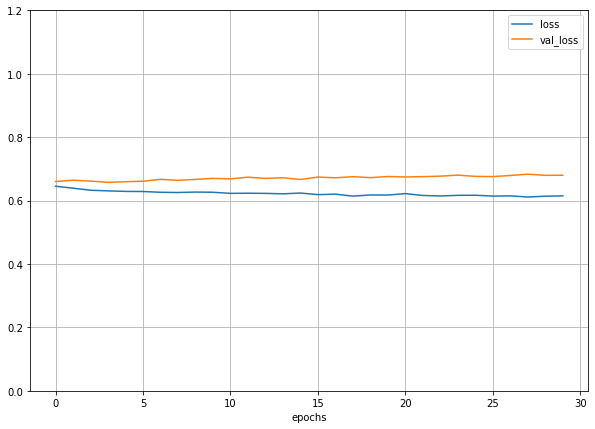

In [329]:
pd.DataFrame(history1.history)[['loss', 'val_loss']].plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()